In [ ]:
# Kerakli kutubxonalarni import qilish
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import math
%matplotlib inline

In [ ]:
# Ma'lumotlar to'plamini import qilish
df = pd.read_csv('/content/bitcoin_price_Training - Training.csv')

Ma'lumotlar ba'zasi bilan tanishib chiqaylik, ya'ni qanday ustunlar bor, va ulardagi ma'lumotlar qanday ko'rinishda, va h.k.

In [ ]:
df.head()

,Date,Open,High,Low,Close,Volume,Market Cap
0,"Jul 31, 2017",2763.24,2889.62,2720.61,2875.34,"860,575,000","45,535,800,000"
1,"Jul 30, 2017",2724.39,2758.53,2644.85,2757.18,"705,943,000","44,890,700,000"
2,"Jul 29, 2017",2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000"
3,"Jul 28, 2017",2679.73,2897.45,2679.73,2809.01,"1,380,100,000","44,144,400,000"
4,"Jul 27, 2017",2538.71,2693.32,2529.34,2671.78,"789,104,000","41,816,500,000"


Endi ma'lumotlar to'plamining texnik jihatlari bilan tanishsak, ya'ni qanday formatda, qatorlar soni va h.k.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1556 entries, 0 to 1555
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        1556 non-null   object 
 1   Open        1556 non-null   float64
 2   High        1556 non-null   float64
 3   Low         1556 non-null   float64
 4   Close       1556 non-null   float64
 5   Volume      1556 non-null   object 
 6   Market Cap  1556 non-null   object 
dtypes: float64(4), object(3)
memory usage: 85.2+ KB


In [ ]:
df.drop(["Date", "Volume", "Market Cap"], axis=1, inplace=True)

In [ ]:
df.shape

(1556, 4)

In [ ]:
# Ma'lumotlar to'plamini NumPy array ko'rinishiga o'tkazish
df = np.array(df, dtype = float)

In [ ]:
# Ma'lumotlar to'plamini bashoratlovchi (x) va yorliq (y) qiymatga ajratib olish
X = df[:,:3]

In [ ]:
X[:10]

array([[2763.24, 2889.62, 2720.61],
       [2724.39, 2758.53, 2644.85],
       [2807.02, 2808.76, 2692.8 ],
       [2679.73, 2897.45, 2679.73],
       [2538.71, 2693.32, 2529.34],
       [2577.77, 2610.76, 2450.8 ],
       [2757.5 , 2768.08, 2480.96],
       [2732.7 , 2777.26, 2699.19],
       [2808.1 , 2832.18, 2653.94],
       [2668.63, 2862.42, 2657.71]])

In [ ]:
X.shape[1]

3

Ma'lumotlar to'plamidan nishonlarni ajratib olamiz, va *Y* o'zgaruvchisiga yuklaymiz.

In [ ]:
Y = df[:,3:]

In [ ]:
Y.shape

(1556, 1)

In [ ]:
Y[:10]

array([[2875.34],
       [2757.18],
       [2726.45],
       [2809.01],
       [2671.78],
       [2529.45],
       [2576.48],
       [2754.86],
       [2730.4 ],
       [2810.12]])

## Kirish o'zgaruvchilari sayqallanishi - standartlashtirish

Kirish o'zgaruvchilarini sayqallashtirishda standartlashtirish usuilidan foydalanaylik, bunda quyidagi formuladan foydalanamiz:

$ x_j^{(i)} := \frac{x_j^{(i)} - \mu_j }{S_j} $

Yuqoridagi formuladagi o'rta arifmetik qiymat ($\mu_j$) hamda o'rta kvadratik og'ishni ($S_j$) topishda *numpy* bibliotekasidagi *mean()* va *std()* funksiyalardan foydalanamiz va ushbu formulani ifoda etuvchi *feature_scaling* funksiyasini yarataylik.

In [ ]:
# Kiruvchi o'zgaruvchilarning sayqallanishi ya'ni standartizatsiya qilish
def feature_scaling(X):
    avg_array = np.mean(X, 0)
    std_array = np.std(X, 0)
    return np.divide(X - avg_array, std_array)

In [ ]:
# Funksiyani x o'zgaruvchisiga qo'llash
X = feature_scaling(X)

In [ ]:
X[:10]

array([[4.16968102, 4.22172018, 4.25686272],
       [4.09539366, 3.98022134, 4.10705497],
       [4.25339532, 4.0727569 , 4.20187125],
       [4.00999666, 4.23614489, 4.17602665],
       [3.74034406, 3.86008907, 3.8786456 ],
       [3.81503297, 3.70799399, 3.72334068],
       [4.15870523, 3.9978147 , 3.78297904],
       [4.1112837 , 4.01472644, 4.21450683],
       [4.25546045, 4.11590209, 4.12502953],
       [3.9887717 , 4.17161133, 4.13248432]])

Vertikal hisoblarda qulay bo'lish uchun, qiymati $1$dan iborat bo'lgan vektor $X_0$ni $X$ massiviga qo'shaylik.

In [ ]:
# x ma'lumotlarimizga bias ustunini qo'shish
def add_bias(X):
    A_0 = np.ones((X.shape[0], 1))
    return np.hstack((A_0, X))

In [ ]:
# add_bias() funksiyasini X o'zgaruvchisi uchun qo'llash
X = add_bias(X)

In [ ]:
X[:10]

array([[1.        , 4.16968102, 4.22172018, 4.25686272],
       [1.        , 4.09539366, 3.98022134, 4.10705497],
       [1.        , 4.25339532, 4.0727569 , 4.20187125],
       [1.        , 4.00999666, 4.23614489, 4.17602665],
       [1.        , 3.74034406, 3.86008907, 3.8786456 ],
       [1.        , 3.81503297, 3.70799399, 3.72334068],
       [1.        , 4.15870523, 3.9978147 , 3.78297904],
       [1.        , 4.1112837 , 4.01472644, 4.21450683],
       [1.        , 4.25546045, 4.11590209, 4.12502953],
       [1.        , 3.9887717 , 4.17161133, 4.13248432]])

In [ ]:
X.shape[1]

4

## Ma'lumotlarni mashq/test to'plamlariga bo'lish

Bizda mavjud bo'lgan ma'lumotlar to'plamini mash/test to'plamlariga bo'laylik. Bunda biz yaratadigan chiziqli regressiya mashq datasetdan o'rganadi va test datasetdan uning effektivligini tekshiramiz. Mashq/test datasetga bo'lishda 80/20 nisbatdan foydalanamiz, ya'ni ma'lumotlar to'plamining 80% mashq va 20% esa test datasetga bo'lamiz.

In [ ]:
# X ma'lumotlarimzni qatorlar soni
rows, _ = X.shape

In [ ]:
rows

1556

In [ ]:
# Ma'lumotlar to'plamini mashq (train) va sinov (test) to'plamlariga ajratish
def split(X, Y):
    rows, _ = X.shape
    train_rows = round(rows * 0.8)
    test_rows = rows - train_rows
    return X[0:train_rows,:], X[train_rows:, :], Y[0:train_rows,:], Y[train_rows:, :]

In [ ]:
X_train, X_test, Y_train, Y_test = split(X, Y)

In [ ]:
X_train.shape

(1245, 4)

In [ ]:
X_test.shape

(311, 4)

In [ ]:
Y_train.shape

(1245, 1)

In [ ]:
Y_test.shape

(311, 1)

## Koefisientlarni inisializatsiya qilish

Ko'p o'zgaruvchili Chiziqli regressiyaning formulasini eslaylik:
<br><br>
$     f(x) = a_0 \times x_0 + a_1 \times x_1 + a_2 \times x_2 + \cdots + a_n \times x_n $
<br><br>
Bizda $n = 3$, chunki ma'lumotlar to'plamida 3 ustun mavjud ($4$-ustun bu qiymati $1$dan iborat bo'lgan $a_0$ vektor). Demak bizda, $a_0$ biasni ham hisobga olganda, 4ta koefisient bo'ladi va ularni vektorlangan ko'rinishda 1 o'lchamli massivda ifodalashimiz mumkin. Koefisientlarni inisializatsiya qilishda *numpy* bibliotekasining tasodifiy sonlarni generatsiya qiluvchi *rand* funksiyasidan foydalanamiz.

In [ ]:
# Koeffitsiyentlarga tasodifiy boshlang'ich qiymat berish
A = np.random.rand(X.shape[1], 1)

In [ ]:
A.shape

(4, 1)

In [ ]:
A

array([[0.27190827],
       [0.7903575 ],
       [0.82250826],
       [0.62455353]])

## Chiziqli regressiya funksiyasi
Bizda koefisientlar uchun o'zgaruvchilarni aniqlab oldik, endi chiziqli regressiyaning asosiy funksiyani aniqlasak bo'ladi. Ushbu funksiyani *f_x()* deb ataylik.

In [ ]:
# X va A matritsalarning o'zaro ko'paytmasi bizga Y ning bashorat qiymatlarini beradi
def f_x(X, A):
    return np.dot(X,A)

## Qiymat funskiyasi va Gradient tushish

Chiziqli regressiyaning qiymat funksiyasini eslaylik:
<br><br>
$     J = \frac{1}{2m} \sum_{i=1}^{m} (f(x^{(i)}) - y^{(i)})^2 $

<br>
Ushbu qimat funksiyasini dasturda ifodalaylik:

In [ ]:
# Qiymat funksiyasi
def cost(X, A, Y, m):
    diff = f_x(X, A) - Y
    diff_2 = np.power(diff, 2)
    sum_ = np.sum(diff_2)
    cost_ = sum_ / (2 * m)
    return cost_

Gradient tushishda esa, biz yuqoridagi qiymat funksiyasini minimallashtiruvchi parametrlarni topamiz. Bunda biz har bir parameter uchun ma'lum bir qator davomida quyidagi ifodani takrorlashimiz kerak:

takrorla, $ k=1 \cdots epochs $ $ \{ $ <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $ a_j := a_j - \alpha \frac{1}{m} \sum_{i=1}^{m} (f(x^{(i)}) - y^{(i)}) \times x^{(i)}_j $ <br>
&nbsp;&nbsp;&nbsp;&nbsp; $ \} $<br>

Yuqoridagi siklni amalga oshirishda bir qator giperparametrlarni aniqlab olaylik:
- Qadamlar soninig qiymatini $500$ deb belgilaymiz va *epochs* o'zgaruvchisida saqlaymiz
- O'rganish darajasini $0.1$ deb belgilaylik va *learning_rate* o'zgaruvchisida saqlaymiz

Har bir qadamdagi qiymatni hisoblaymiz va, *costs* massivida saqlaymiz.

In [ ]:
# Epochlar soni va o'rganish darajasini kiritish
epochs = 100
learning_rate = 0.1

Gradient tushishni amalga oshiruvchi funksiyani yaratamiz va $gradient\_descent$ deb nomlaymiz

In [ ]:
# Gradient tushish funksiyasi
def gradient_descent(X_train, Y_train, X_test, Y_test, A, learning_rate, epochs):
    m_train = Y_train.shape[0]
    m_test = Y_test.shape[0]
    train_costs = []
    test_costs = []
    for k in range(epochs):
        fx = f_x(X_train, A)
        sum_diff = np.dot(X_train.T, np.subtract(fx, Y_train)) / m_train
        A = A - learning_rate * sum_diff
        cost_train = cost(X_train, A, Y_train, m_train)
        cost_test = cost(X_test, A, Y_test, m_test)
        if k % 10 == 0:
            print('epoch: %d, %f'% (k, cost_train))
            print('epoch: %d, %f'% (k, cost_test))
        train_costs.append(cost_train)
        test_costs.append(cost_test)
    return A, train_costs, test_costs

Gradient tushishni amalaga oshiraylik, bunda biz yaratgan *gradient_descent* funksiyasidan foydalanamiz va ushbu funksiya gradient tushishni amalga oshirib, topilgan optimal qiymatni *A* o'zgaruvchisi va har bir qadamdagi *mashq* va *test* to'plamlar uchun qiymat funksiyani ifoda etuvchi *train_costs*, *test_costs* massivlarini qaytaradi.

In [ ]:
# Modelni o'qitish jarayoni
A, train_costs, test_costs = gradient_descent(X_train, Y_train, X_test, Y_test, A, learning_rate, epochs)

epoch: 0, 214343.953683
epoch: 0, 91622.058892
epoch: 10, 15939.362061
epoch: 10, 18092.697188
epoch: 20, 2247.948043
epoch: 20, 2726.807136
epoch: 30, 529.440788
epoch: 30, 656.114746
epoch: 40, 313.032760
epoch: 40, 369.275281
epoch: 50, 285.486433
epoch: 50, 323.680549
epoch: 60, 281.686897
epoch: 60, 314.298930
epoch: 70, 280.873936
epoch: 70, 311.559547
epoch: 80, 280.437328
epoch: 80, 310.398219
epoch: 90, 280.048881
epoch: 90, 309.699991


Gradient tushishda qiymat funksiyasining qay darajada o'zgarganini vizual ko'rish uchun, grafik *plot_cost* funksiyasini yarataylik, ushbu funksiya *matplotlib* bibliotekasidan foydalanib graf chizadi.

In [ ]:
# O'qitish va testlash jarayonida xatolik grafigi funksiyasi
def plot_cost(train_costs,test_costs, epochs):
    plt.xlabel('Epochs')
    plt.ylabel('Cost')
    plt.plot(epochs, train_costs, 'm', linewidth = "1", color='r', label='mashqdagi xatolik')
    plt.plot(epochs, test_costs, 'm', linewidth = "1", color='g', label='testdagi xatolik')
    plt.legend(loc="upper right")
    plt.show()

*plot_cost* funksiyasi parametr sifatida 3 ta massiv o'zgaruvchisini qabul qiladi va bular:
-  mashq to'plami uchun qiymat funksiyasining natijasi ifodalangan massiv, *train_costs* o'zgaruvchisi
-  test to'plami uchun qiymat funksiyasining natijasi ifodalangan massiv, *test_costs* o'zgaruvchisi
- qadamlarni ifoda etuvchi massiv, *epochs* o'zgaruvchisi

In [ ]:
n_epochs = np.arange(1, epochs + 1)
n_train_costs = np.array(train_costs)
n_test_costs = np.array(test_costs)

In [ ]:
# Xatolikni hisoblash
def calculate_loss(X, A, Y):
    m = Y.shape[0]
    fx = f_x(X, A)
    diff = fx - Y
    kv = np.power(diff, 2)
    sum_kv = np.sum(kv)
    kv_m = sum_kv / m
    for i in range(m):
        print('i: %d, fx: %f, Y: %f, diff: %f, kv: %f'%(i, fx[i], Y[i], diff[i], kv[i]))
    rmse = math.sqrt(kv_m)
    print('sum: %f, kv_m: %f, rmse: %f'%(sum_kv, kv_m, rmse))
    return rmse

In [ ]:
# Har bir epoch uchun xatolikni ekranga chop etish
print('root mean squared errrors: ', calculate_loss(X_test, A, Y_test))

i: 0, fx: 674.572744, Y: 666.780000, diff: 7.792744, kv: 60.726858
i: 1, fx: 608.224461, Y: 667.760000, diff: -59.535539, kv: 3544.480444
i: 2, fx: 564.621834, Y: 559.790000, diff: 4.831834, kv: 23.346621
i: 3, fx: 554.909805, Y: 565.610000, diff: -10.700195, kv: 114.494179
i: 4, fx: 570.158343, Y: 549.260000, diff: 20.898343, kv: 436.740752
i: 5, fx: 581.667172, Y: 578.770000, diff: 2.897172, kv: 8.393605
i: 6, fx: 558.082006, Y: 582.690000, diff: -24.607994, kv: 605.553347
i: 7, fx: 498.852549, Y: 538.710000, diff: -39.857451, kv: 1588.616404
i: 8, fx: 583.939998, Y: 546.320000, diff: 37.619998, kv: 1415.264243
i: 9, fx: 616.327583, Y: 605.820000, diff: 10.507583, kv: 110.409306
i: 10, fx: 582.933676, Y: 605.420000, diff: -22.486324, kv: 505.634778
i: 11, fx: 557.086137, Y: 574.160000, diff: -17.073863, kv: 291.516784
i: 12, fx: 602.199722, Y: 556.140000, diff: 46.059722, kv: 2121.497999
i: 13, fx: 626.869693, Y: 623.030000, diff: 3.839693, kv: 14.743239
i: 14, fx: 629.539488, Y: 626

Gradient tushish orqali topilgan optimal koefisientlar qiymatlari bilan ham tanishishimiz mumkin:

In [ ]:
A

array([[583.69199066],
       [170.07727247],
       [174.29079978],
       [181.36673665]])

Qiymat funksiyasini har qadamda o'zgarishini *plot_cost* funksiyasi orqali grafik tarzda ifodalaylik.

<ipython-input-42-ad8d645f5eb4>:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "m" (-> color=(0.75, 0.0, 0.75, 1)). The keyword argument will take precedence.
  plt.plot(epochs, train_costs, 'm', linewidth = "1", color='r', label='mashqdagi xatolik')
<ipython-input-42-ad8d645f5eb4>:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "m" (-> color=(0.75, 0.0, 0.75, 1)). The keyword argument will take precedence.
  plt.plot(epochs, test_costs, 'm', linewidth = "1", color='g', label='testdagi xatolik')


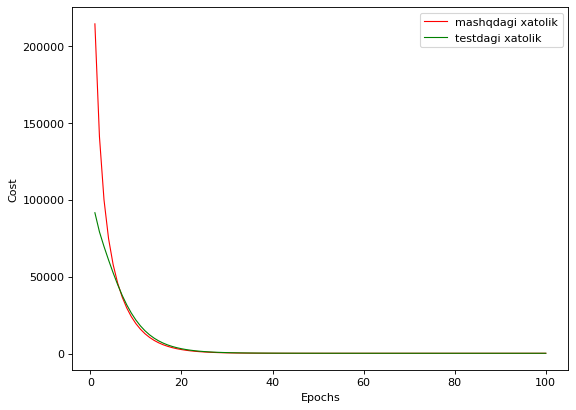

In [ ]:
# Xatolik grafigi funksiyasini ishga tushirish
figure(figsize=(8, 6), dpi=80)

plot_cost(train_costs, test_costs, n_epochs)

Yuqoridagi grafdan ko'rib turibmizki, xatolik mashq to'plamida ham, test to'plamida ham har qadamda tushib boryapti. Bundan xulosa qilishimiz mumkinki, biz yaratgan chiziqli regressiya to'g'ri ishlayapti.

Endi amalda test to'plamdagi birinchi 10 qatorni chiziqli regressiya topgan koefisientlar orqali bashorat qilaylik va haqiqiy nishonlar bilan tekshiraylik:

In [ ]:
m_to_predict = 10

predicted = f_x(X_test[:m_to_predict,:], A)

for i in range(m_to_predict):
    print('bashorat: %f, haqiqiy: %f'%(predicted[i], Y_test[i]))

bashorat: 674.572744, haqiqiy: 666.780000
bashorat: 608.224461, haqiqiy: 667.760000
bashorat: 564.621834, haqiqiy: 559.790000
bashorat: 554.909805, haqiqiy: 565.610000
bashorat: 570.158343, haqiqiy: 549.260000
bashorat: 581.667172, haqiqiy: 578.770000
bashorat: 558.082006, haqiqiy: 582.690000
bashorat: 498.852549, haqiqiy: 538.710000
bashorat: 583.939998, haqiqiy: 546.320000
bashorat: 616.327583, haqiqiy: 605.820000


Ko'rib turibmizki, biroz xatolik bilan bo'lsada, bashorat qilingan nishonlar haqiqiy nishonlar qiymatlariga bilan yaqin.